## Disease prediction assigement

In [1]:
#importing tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
data = '/Users/saragunnars/Skola/GitHub/Machine-learning-Sara-Gunnars/Data/cardio_train.csv'
df_cardio = pd.read_csv(data, sep = ';')  #seperates columns by ;

### Data cleaning

#### Data description from Kaggle
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download
1. Age | Objective | Feature | age | int (days)
2. Height | Objective | Feature height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |  1 women 2 men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [3]:
df_cardio.info()# overlook of datatypes and amounts of values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#removing Na values
df_cardio = df_cardio.dropna()

In [6]:
#converting age from days to years
df_cardio['age'] = df_cardio['age'] / 365
df_cardio['age'] = df_cardio['age'].astype(int) #removing away decimals in age by converting to int
df_cardio.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


##### Removing min blood pressure values that are unresonable

In [7]:
df_cardio.min()

id               0.0
age             29.0
gender           1.0
height          55.0
weight          10.0
ap_hi         -150.0
ap_lo          -70.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           0.0
cardio           0.0
dtype: float64

In [8]:
df_cardio['ap_hi'] = df_cardio['ap_hi'][df_cardio['ap_hi'] >= 0]
df_cardio['ap_lo'] = df_cardio['ap_lo'][df_cardio['ap_lo'] >= 0]

In [9]:
df_cardio.min()

id              0.0
age            29.0
gender          1.0
height         55.0
weight         10.0
ap_hi           1.0
ap_lo           0.0
cholesterol     1.0
gluc            1.0
smoke           0.0
alco            0.0
active          0.0
cardio          0.0
dtype: float64

##### Removing max blood pressure values that are unresonable

In [10]:
df_cardio.max()

id             99999.0
age               64.0
gender             2.0
height           250.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [11]:
df_cardio['ap_lo'] = df_cardio['ap_lo'][df_cardio['ap_lo'] < 300]
df_cardio['ap_hi'] = df_cardio['ap_hi'][df_cardio['ap_hi'] < 300]
df_cardio.max()

id             99999.0
age               64.0
gender             2.0
height           250.0
weight           200.0
ap_hi            240.0
ap_lo            190.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

###  2.0 Explorative data analysis


#### a) How many suffer from cardiovascular disease and how  many don't?

In [12]:
cardio_positive = df_cardio['cardio'][df_cardio['cardio'] == 1.0].value_counts()
cardio_negative = df_cardio['cardio'][df_cardio['cardio'] == 0.0].value_counts()

#.to_string(index=False) removes index nr and data information such as dtype
print(f"Suffer from cardiovascular disease: {cardio_positive.to_string(index=False)}")
print(f"Don't suffer from cardiovascular disease: {cardio_negative.to_string(index=False)}")


Suffer from cardiovascular disease: 34979
Don't suffer from cardiovascular disease: 35021


#### b) What proportions of the patients have normal, above normal and well above normal cholesterol values. Create piechart

In [13]:
#Amount of patients per cholesterol value category
pie_data = df_cardio.groupby(by ='cholesterol')['id'].count()
pie_data

cholesterol
1    52385
2     9549
3     8066
Name: id, dtype: int64

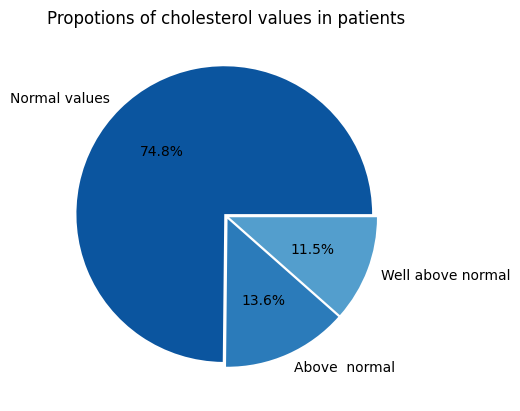

In [14]:


#creating labels and customizing chart
labels = ['Normal values', 'Above  normal', 'Well above normal']
explode = (0.02,0.02,0.02) #detatching our last slice  from the rest
percentage = '%1.1f%%'
colors = sns.color_palette('Blues_r')

#creating the  chart with our data, labels and adding percentage to it
plt.pie(pie_data, colors = colors, labels = labels, autopct= percentage, explode = explode)
plt.title('Propotions of cholesterol values in patients')



plt.show()

#### c) What is the age distribution)

In [15]:
#dist of age
df_age_dist = df_cardio.groupby(by= 'age')['id'].count()
df_age_dist.head()

age
29       3
30       1
39    1780
40    1622
41    1903
Name: id, dtype: int64

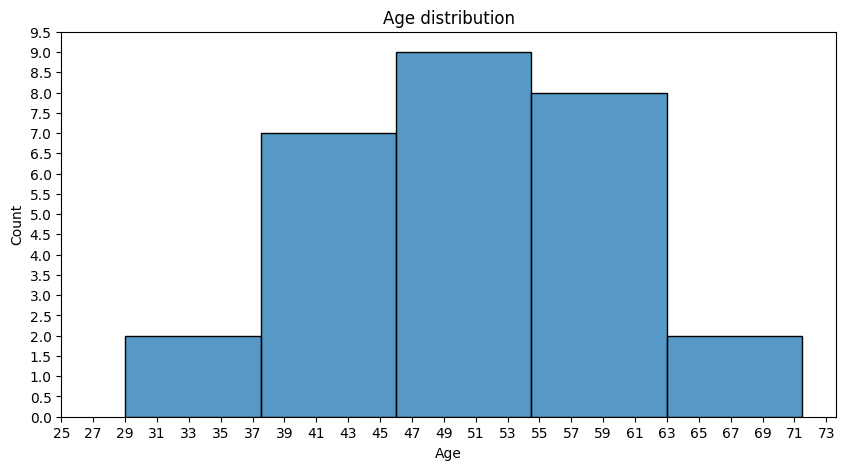

In [16]:
import numpy as  np

#plotting and customizing graph
plt.figure(figsize= (10,5))
sns.histplot(df_age_dist, x = 'age', binwidth = 8.5).set(title = 'Age distribution')
plt.xlabel("Age")

#changing ticks range  for x nd y label
plt.xticks(np.arange(25, 75, 2))
plt.yticks(np.arange(0, 10, 0.5))

plt.show()

#### d) How many are smokers?

In [22]:
#grouping data
df_smoke = df_cardio.groupby(by = 'smoke')['id'].count()
df_smoke

smoke
0    63831
1     6169
Name: id, dtype: int64

In [30]:
# calculating share and multiplying by 100 to present the percentage
smokers = (df_smoke[1]/len(df_cardio))*100
print("%.1f" % smokers, "percent are smokers")


8.8 percent are smokers


#### e) What's the weight distribution? plot appropriate chart

In [93]:
#df sorted based on weight
sorted_cardio = df_cardio.groupby(by='weight')['id'].count().to_frame().reset_index()
sorted_cardio.head(10)

,weight,id
0,10.0,1
1,11.0,1
2,21.0,1
3,22.0,1
4,23.0,1
5,28.0,1
6,29.0,1
7,30.0,3
8,31.0,1
9,32.0,3


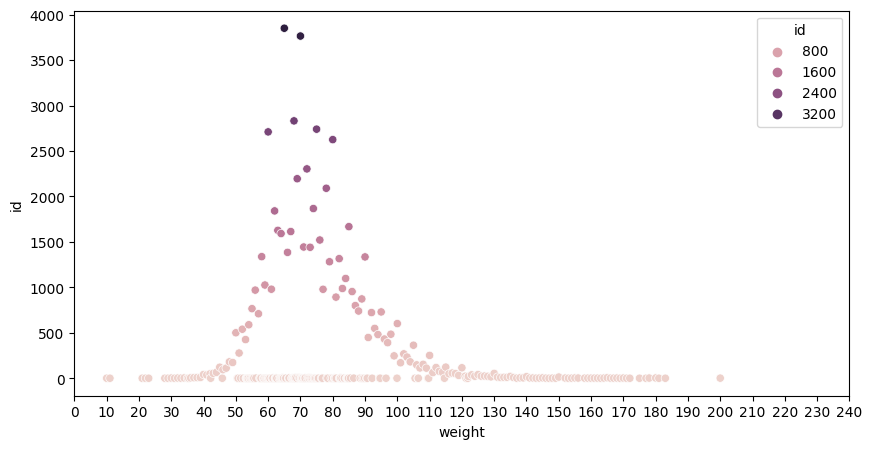

In [99]:
#style dictionary in matplotlib
from matplotlib import rcParams

sns.scatterplot(sorted_cardio, x='weight', y='id', hue = 'id')
#setting plotsize
rcParams['figure.figsize'] = 10,5
plt.xticks(np.arange(0,250,10))

plt.show()